In [1]:
# Importa as bibliotecas necessárias para a exploração do dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Importa o dataframe
df = pd.read_csv('/content/agencias.csv')

In [6]:
# Verifica o formato do dataframe
df.shape

(10, 7)

In [ ]:
# Verifica se há valores nulos no dataframe
df.isnull()

In [9]:
# Visualiza as 05 primeiras linhas
df.head()

,cod_agencia,nome,endereco,cidade,uf,data_abertura,tipo_agencia
0,7,Agência Digital,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2015-08-01,Digital
1,1,Agência Matriz,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2010-01-01,Física
2,2,Agência Tatuapé,"Praça Sílvio Romero, 158 - Tatuapé, São Paulo ...",São Paulo,SP,2010-06-14,Física
3,3,Agência Campinas,"Av. Francisco Glicério, 895 - Vila Lidia, Camp...",Campinas,SP,2012-03-04,Física
4,4,Agência Osasco,"Av. Antônio Carlos Costa, 1000 - Bela Vista, O...",Osasco,SP,2013-11-06,Física


In [10]:
# Verifica as agências existentes
df['nome'].unique

<bound method Series.unique of 0           Agência Digital
1            Agência Matriz
2           Agência Tatuapé
3          Agência Campinas
4            Agência Osasco
5      Agência Porto Alegre
6    Agência Rio de Janeiro
7           Agência Jardins
8     Agência Florianópolis
9            Agência Recife
Name: nome, dtype: object>

In [12]:
# Obtém informações sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cod_agencia    10 non-null     int64 
 1   nome           10 non-null     object
 2   endereco       10 non-null     object
 3   cidade         10 non-null     object
 4   uf             10 non-null     object
 5   data_abertura  10 non-null     object
 6   tipo_agencia   10 non-null     object
dtypes: int64(1), object(6)
memory usage: 688.0+ bytes


In [18]:
# Exibe estatísticas descritivas
df.describe()

,cod_agencia
count,10.00000
mean,5.50000
std,3.02765
min,1.00000
25%,3.25000
50%,5.50000
75%,7.75000
max,10.00000


<BarContainer object of 5 artists>

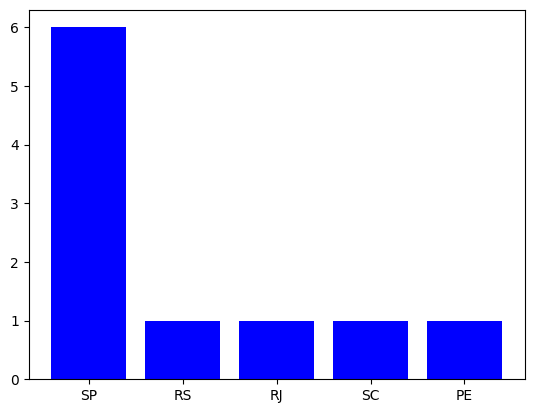

In [29]:
# Imprime gráfico sobre localização das agências por estado
contagem_agencias = df['uf'].value_counts()
plt.bar(contagem_agencias.index, contagem_agencias.values, color='blue')